## Initial code

In [1]:
import os
import sys


curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)
sys.path.append(parent_dir)


import psutil
from utils import check_and_install
    
# List of packages to check, with any special names or setup functions
packages = [
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "scipy",
    "tqdm",
    "pandarallel",
    "thinc",
    "srsly",
    "fastai",
    "matplotlib-venn",
    "ipympl",
    "jupyterlab",
    "ipywidgets",

]

# Loop through each package, importing and installing if needed
for package in packages:
    check_and_install(package)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


from multiprocessing import Pool
from matplotlib_venn import venn3
from IPython.display import display


from pandarallel import pandarallel

real_cpu_count = psutil.cpu_count(logical=False)
pandarallel.initialize(progress_bar=True)
widgets.Widget.widgets = {}  # Clear widget state



scikit-learn not found, installing...
scikit-learn has been installed
matplotlib-venn not found, installing...
matplotlib-venn has been installed
INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
DatasetRaces = pd.read_csv("../dataset/races_filled.csv")
DatasetCyclists = pd.read_csv("../dataset/cyclists_filled.csv")

MergedDataset = pd.merge(DatasetCyclists, DatasetRaces.drop(columns=['name']), left_on='_url', right_on='cyclist', suffixes=('_cyclist', '_race')).drop(columns=['_url_cyclist']) 
del MergedDataset['race_year']

print(MergedDataset.duplicated().sum())
print(MergedDataset.isnull().sum())

MergedDataset.sample(3)


0
name                    0
birth_year              0
weight                  0
height                  0
nationality             0
_url_race               0
points                  0
uci_points              0
length                  0
climb_total             0
profile                 0
startlist_quality       0
date                    0
position                0
cyclist                 0
cyclist_age             0
is_tarmac               0
is_cobbled              0
is_gravel               0
cyclist_team         2457
delta                   0
dtype: int64


,name,birth_year,weight,height,nationality,_url_race,points,uci_points,length,climb_total,...,startlist_quality,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
171045,Jorge Arcas,1992.0,68.0,187.0,Spain,vuelta-a-espana/2017/stage-3,0,0.0,158500.0,3623.0,...,899,2017-08-21 04:01:22,168,jorge-arcas,25.0,True,False,False,Movistar Team,1400.0
375720,Rigoberto Urán,1987.0,63.0,173.0,Colombia,dauphine/2020/stage-2,0,0.0,135000.0,2878.0,...,1243,2020-08-13 03:39:40,24,rigoberto-uran,33.0,True,False,False,EF Pro Cycling,97.0
93058,Jesper Hansen,1990.0,60.0,172.0,Denmark,vuelta-a-espana/2015/stage-4,0,0.0,209600.0,2141.0,...,1115,2015-08-25 05:07:30,128,jesper-hansen-1,25.0,True,False,False,Tinkoff - Saxo,312.0


In [9]:
outliers_lof = pd.read_csv('../dataset/outliers_lof.csv')
outliers_iso_for = pd.read_csv('../dataset/outliers_iso_for.csv')
outliers_oc_svm_gpu = pd.read_csv('../dataset/outliers_oc_svm.csv')

all_outliers = pd.concat([outliers_lof, outliers_iso_for, outliers_oc_svm_gpu]).drop_duplicates(subset=["name_cyclist", "name_race"])

dict_outliers_lof = outliers_lof.set_index(["name_cyclist", "name_race"]).to_dict(orient="index")
dict_outliers_iso_for = outliers_iso_for.set_index(["name_cyclist", "name_race"]).to_dict(orient="index")
dict_outliers_oc_svm = outliers_oc_svm_gpu.set_index(["name_cyclist", "name_race"]).to_dict(orient="index")

dict_outliers = {**dict_outliers_lof, **dict_outliers_iso_for, **dict_outliers_oc_svm}

all_normal_indexes = MergedDataset[~MergedDataset[["cyclist", "_url_race"]].apply(lambda x: tuple(x) in dict_outliers, axis=1)].index
all_outliers_indexes =  MergedDataset[MergedDataset[["cyclist", "_url_race"]].apply(lambda x: tuple(x) in dict_outliers, axis=1)].index


NumericalDataset = MergedDataset.select_dtypes(include=[np.number])

normal_lof = MergedDataset[~MergedDataset[["cyclist", "_url_race"]].apply(lambda x: tuple(x) in dict_outliers_lof, axis=1)] 
normal_iso_for = MergedDataset[~MergedDataset[["cyclist", "_url_race"]].apply(lambda x: tuple(x) in dict_outliers_iso_for, axis=1)]
normal_oc_svm = MergedDataset[~MergedDataset[["cyclist", "_url_race"]].apply(lambda x: tuple(x) in dict_outliers_oc_svm, axis=1)]

outliers_lof = MergedDataset[MergedDataset[["cyclist", "_url_race"]].apply(lambda x: tuple(x) in dict_outliers_lof, axis=1)]
outliers_iso_for = MergedDataset[MergedDataset[["cyclist", "_url_race"]].apply(lambda x: tuple(x) in dict_outliers_iso_for, axis=1)]
outliers_oc_svm_gpu = MergedDataset[MergedDataset[["cyclist", "_url_race"]].apply(lambda x: tuple(x) in dict_outliers_oc_svm, axis=1)]


normal_lof_num = normal_lof.select_dtypes(include=[np.number])
normal_iso_for_num = normal_iso_for.select_dtypes(include=[np.number])
normal_oc_svm_num = normal_oc_svm.select_dtypes(include=[np.number])

outliers_lof_num = outliers_lof.select_dtypes(include=[np.number])
outliers_iso_for_num = outliers_iso_for.select_dtypes(include=[np.number])
outliers_oc_svm_num = outliers_oc_svm_gpu.select_dtypes(include=[np.number])

normal_lof.sample(3)

,name,birth_year,weight,height,nationality,_url_race,points,uci_points,length,climb_total,...,startlist_quality,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
583386,Rui Costa,1986.0,69.0,182.0,Portugal,tour-de-france/2019/stage-12,18,0.0,209500.0,3088.0,...,1699,2019-07-18 04:57:53,8,rui-costa,33.0,True,False,False,UAE Team Emirates,88.0
139757,Jarlinson Pantano,1988.0,61.0,173.0,Colombia,giro-d-italia/2014/stage-12,0,0.0,42200.0,654.0,...,892,2014-05-22 00:57:34,103,jarlinson-pantano,26.0,True,False,False,Team Colombia,445.0
357044,Nico Denz,1994.0,71.0,183.0,Germany,paris-nice/2020/stage-7,0,0.0,166500.0,3969.0,...,1082,2020-03-14 04:27:01,36,nico-denz,26.0,True,False,False,Team Sunweb,787.0


## Outliers analysis

Since each run of the algorithms might produce different parameters and different outliers, we will use the outliers generated by the main notebook.

### Outliers feature

Most important features for outliers detection:
Feature
cyclist_age          2589
startlist_quality    2311
length               2229
height               1370
points               1347
weight               1166
climb_total           968
uci_points            883
Name: count, dtype: int64



Summary statistics:
                     Normal_Mean    Normal_Std   Outlier_Mean   Outlier_Std  \
weight                 68.445304      6.202908      69.423628      6.363010   
height                179.766577      6.304752     180.447948      6.501443   
points                  3.145285     12.596374      22.526938     55.907416   
uci_points              2.976867     19.412480      31.696416    107.556780   
length             167561.631008  64048.272966  145743.201430  81325.992933   
climb_total          2345.107714   1286.438536    2033.001011   1339.763724   
startlist_quality    1102.037202    378.879759     897.870248    391.080856   
cyclist_age            28.463319      3.830208      28.

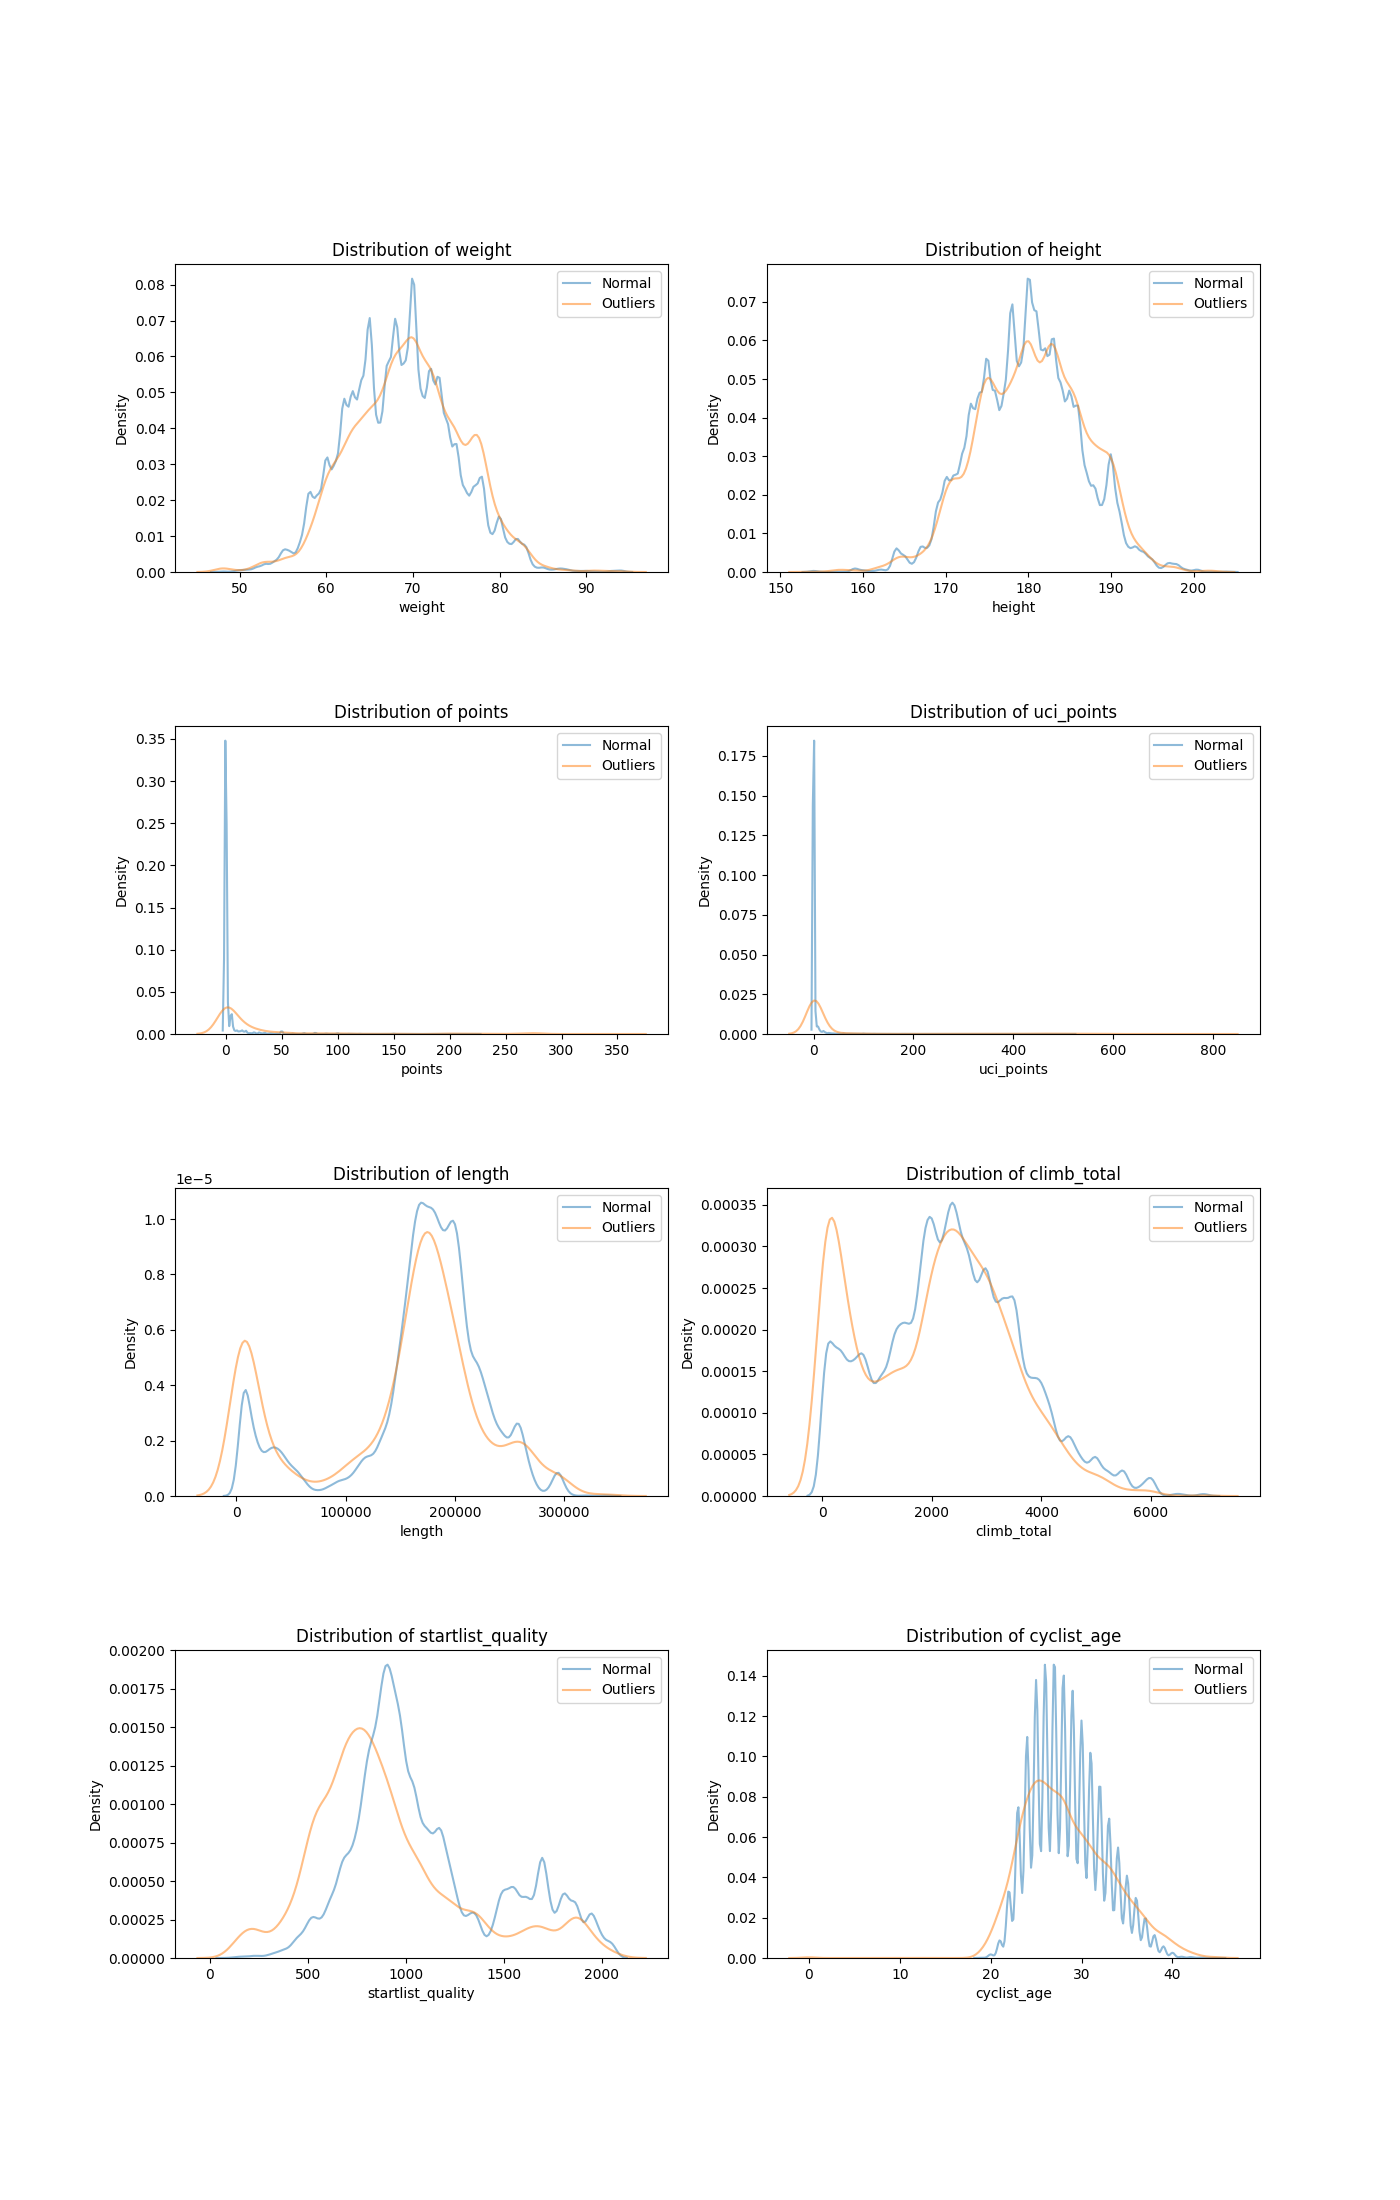

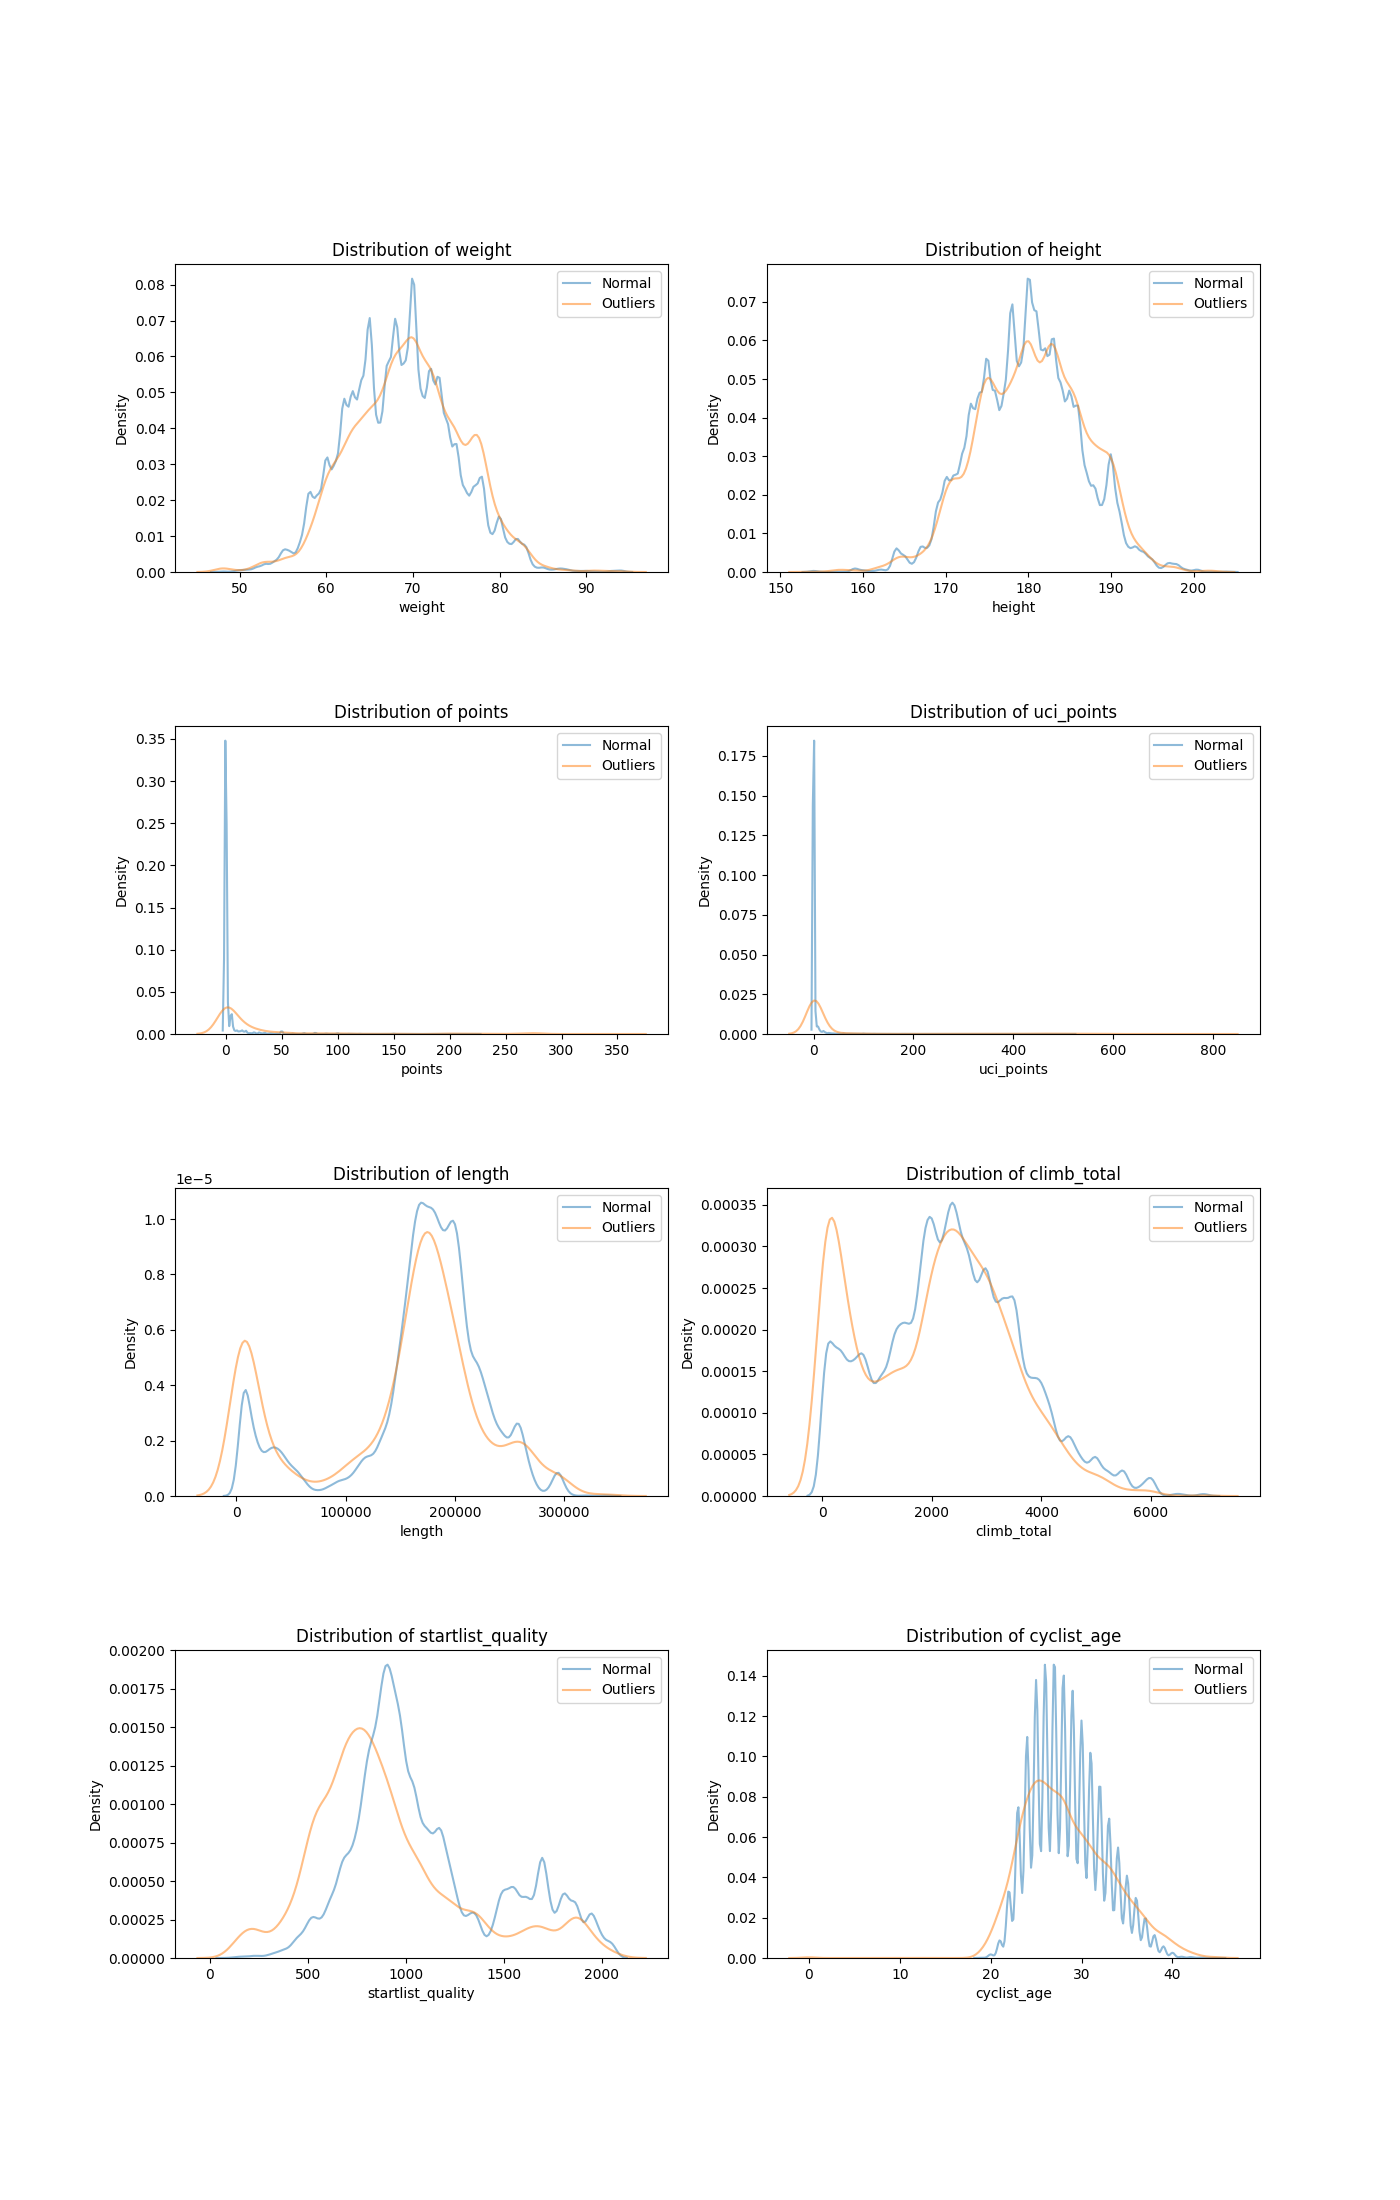

In [10]:
from outliers_code.outliers_analysis import analyze_outlier_characteristics

numerical_features = ['weight', 'height', 'points', 'uci_points', 'length', 
                     'climb_total', 'startlist_quality', 'cyclist_age']

analysis = analyze_outlier_characteristics(MergedDataset.loc[all_normal_indexes], MergedDataset.loc[all_outliers_indexes], numerical_features)

print("Most important features for outliers detection:")
print(analysis['feature_importance'].head(10))
print("\n\n")
print("Summary statistics:")
print(analysis['summary_stats'])

analysis['distribution_plot'].show()

### Outliers difference

#### Venn Diagrams

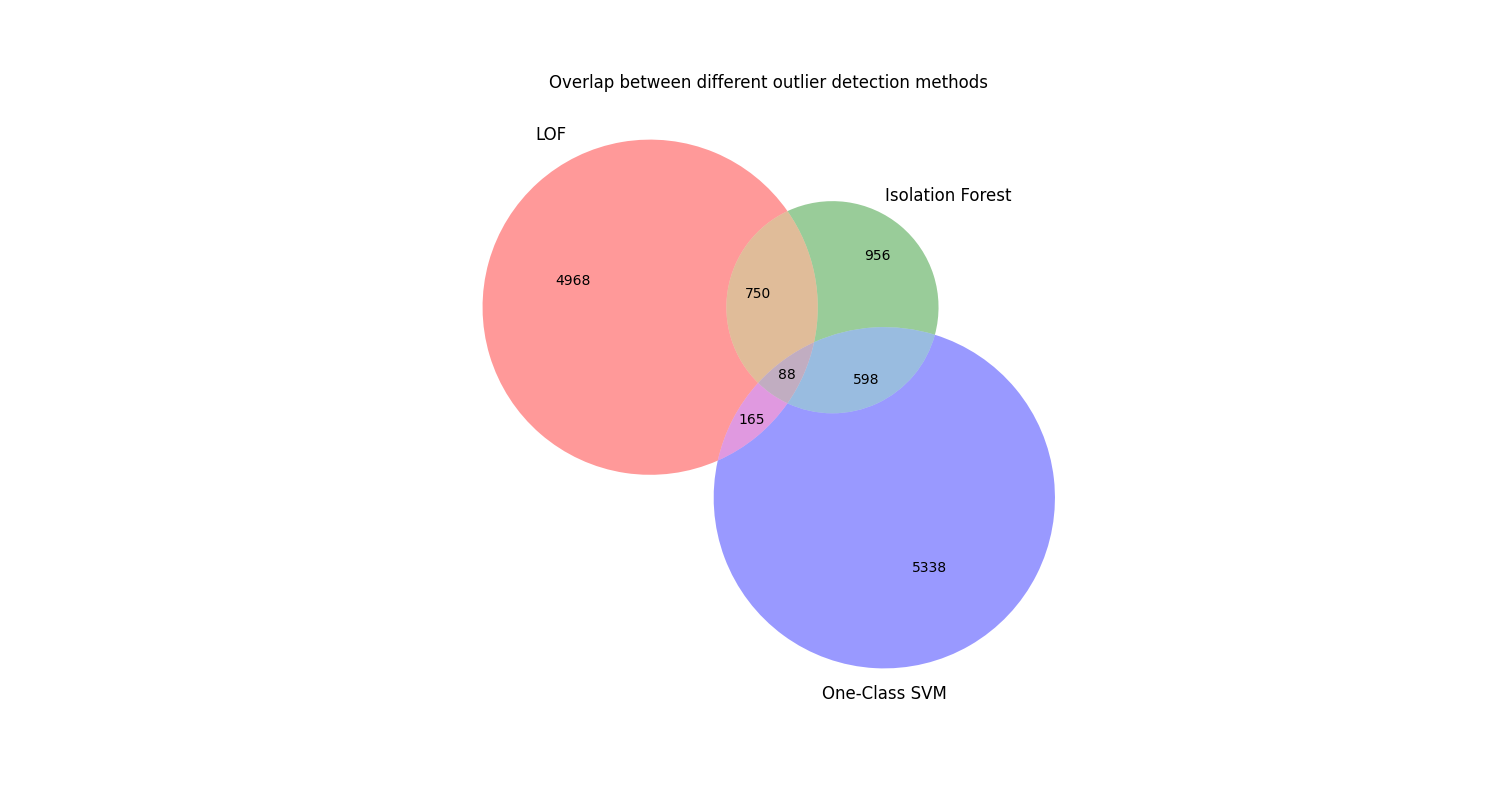

In [ ]:
lof_set = set(outliers_lof.index)
iso_set = set(outliers_iso_for.index)
oc_svm_set = set(outliers_oc_svm_gpu.index)


fig = plt.figure(figsize=(15, 8))

venn3([lof_set, iso_set, oc_svm_set], 
      set_labels=('LOF', 'Isolation Forest', 'One-Class SVM'))
plt.title('Overlap between different outlier detection methods')

plt.show()




#### Outliers

Total cyclist outliers: 1337
Total race outliers: 957

Outlier Analysis Summary:
Total outliers detected: 12863
Cyclist-related outliers: 1337
Race-related outliers: 957
Unclassified outliers: 10569

Top 10 Cyclists with highest outlier ratios:
mario-mariotti: 100.00%
willy-moonen: 100.00%
ricky-eno-jorgensen: 100.00%
tiago-nunes: 100.00%
blaise-sonnery: 100.00%
julian-cuevas: 100.00%
francesco-masi: 100.00%
geir-digerud: 100.00%
paul-magnier: 100.00%
john-lieswyn: 100.00%

Top 10 Races with highest outlier ratios:
tour-de-france/1986/prologue: 100.00%
giro-d-italia/2005/prologue: 100.00%
tour-de-suisse/1991/prologue: 100.00%
tour-de-romandie/1977/prologue: 100.00%
paris-nice/1975/prologue: 100.00%
paris-nice/1972/prologue: 100.00%
tour-de-france/1988/prologue: 100.00%
tour-de-suisse/1995/prologue: 100.00%
tour-de-romandie/1981/prologue: 100.00%
dauphine/1983/prologue: 100.00%


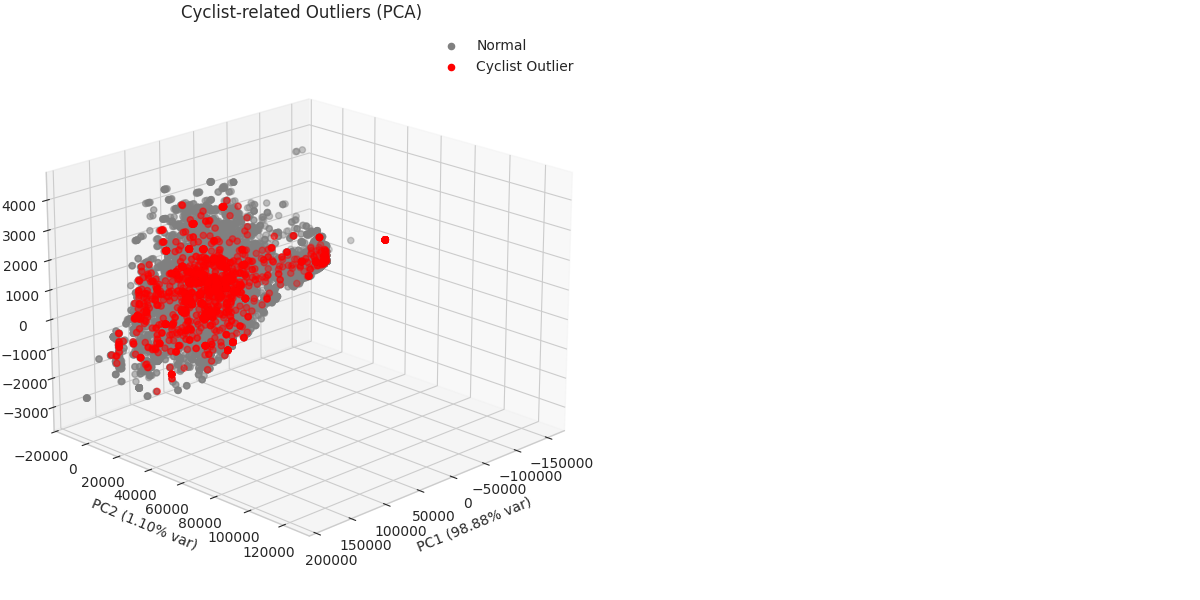

In [14]:
%matplotlib widget
from outliers_code.outliers_analysis import visualize_outlier_types, print_outlier_summary

summary = visualize_outlier_types(
    data=MergedDataset,
    all_outliers_indx=set(all_outliers_indexes),
    min_races_threshold=1  # Minimum races to consider patterns significant
)

print_outlier_summary(summary)

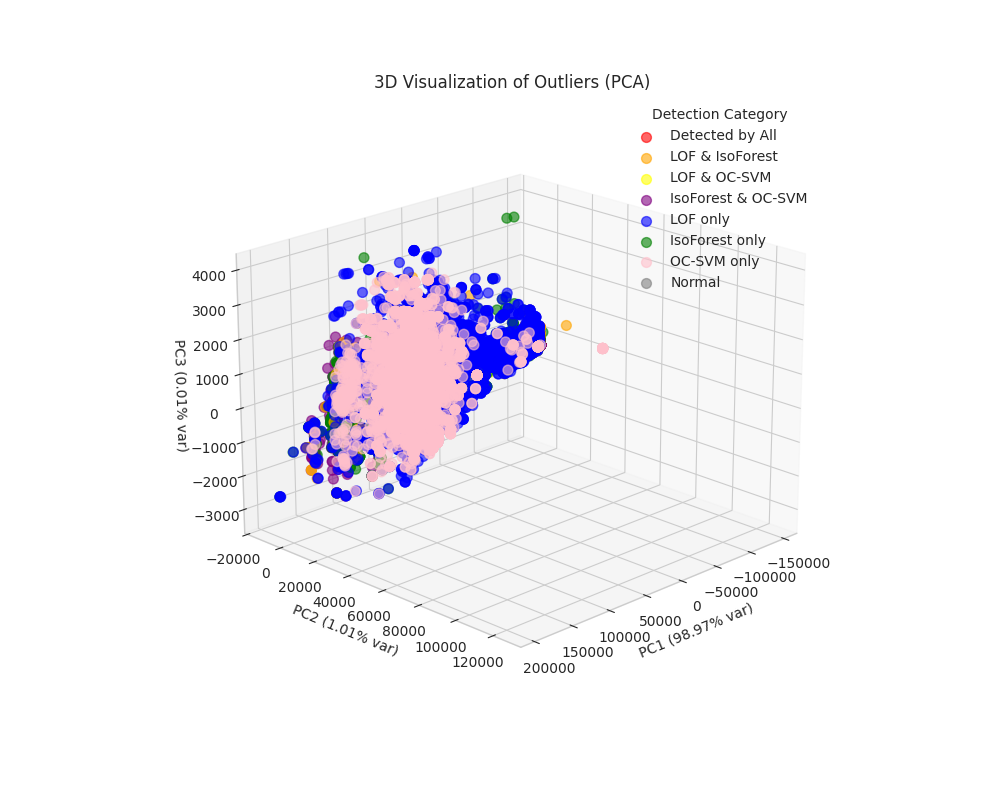

In [15]:
%matplotlib widget
from outliers_code.outliers_analysis import visualize_outliers_3d

visualize_outliers_3d(NumericalDataset.loc[all_outliers_indexes], lof_set, iso_set, oc_svm_set)


### Z-scores, box plots

In [17]:
from outliers_code.outliers_analysis import (
    calculate_z_score, 
    plot_outlier_scores, 
    plot_z_score_distributions,    
)

NumericalDataset = normal_lof.select_dtypes(include=[np.number])
stats = NumericalDataset.agg(['mean', 'std'])
data_mean, data_std = stats.loc['mean'], stats.loc['std']



data_tuples = [
    (outliers_lof[NumericalDataset.columns], data_mean, data_std),
    (outliers_iso_for[NumericalDataset.columns], data_mean, data_std),
    (outliers_oc_svm_gpu[NumericalDataset.columns], data_mean, data_std)
]
with Pool() as pool:
    z_scores = pool.map(calculate_z_score, data_tuples)

z_scores_lof, z_scores_iso_for, z_scores_oc_svm = z_scores



#### Histogram plots of outliers z-scores

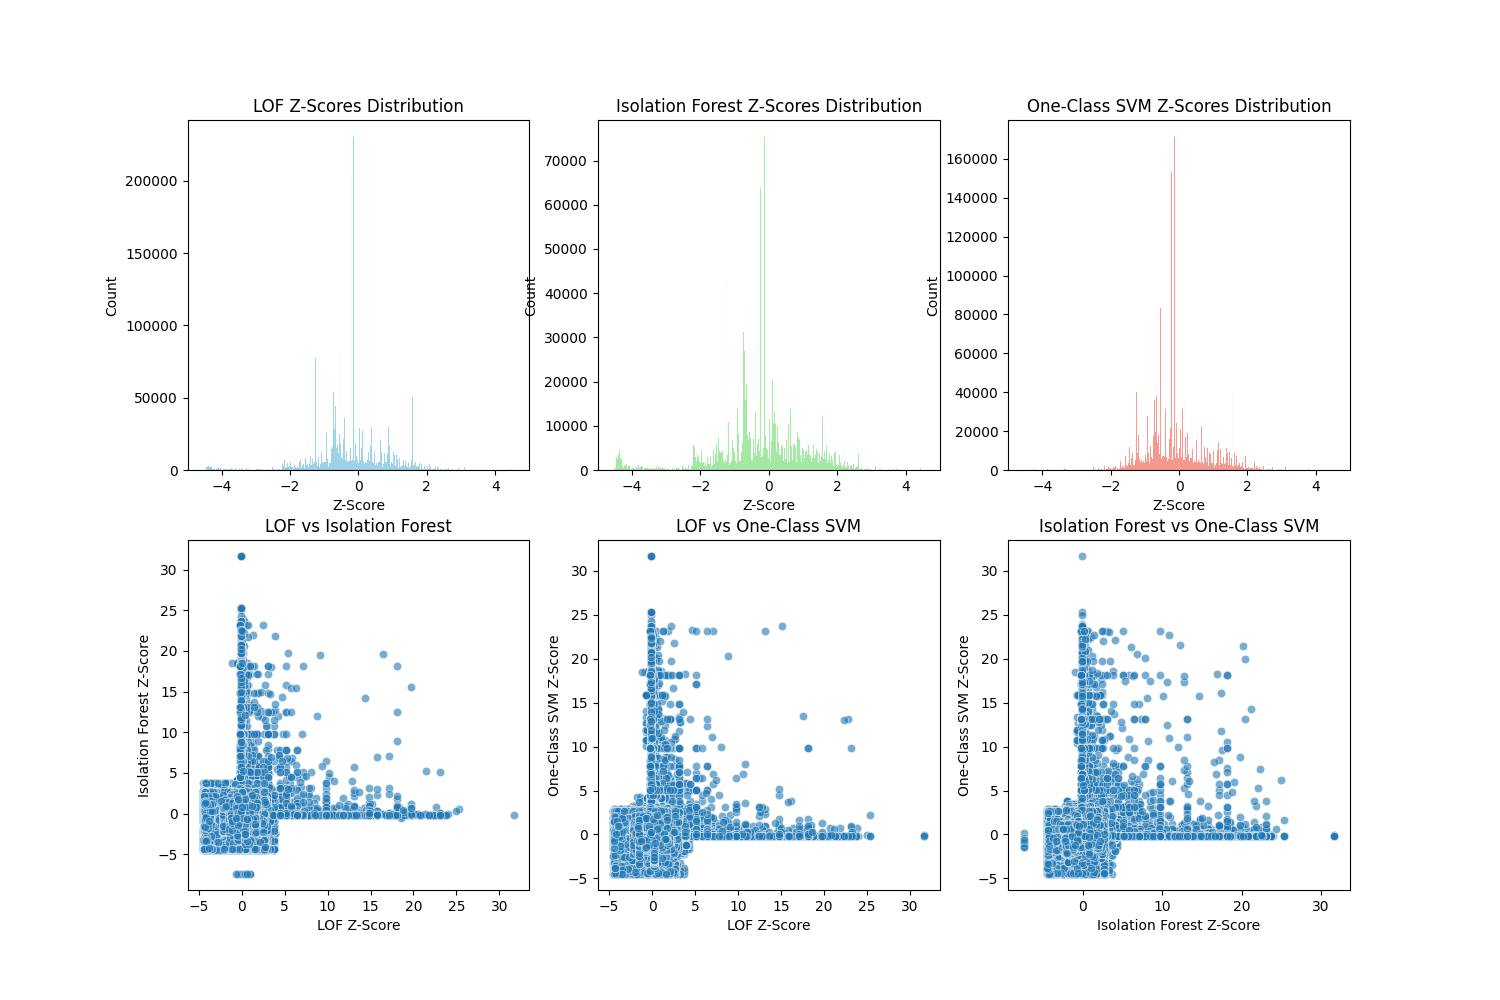

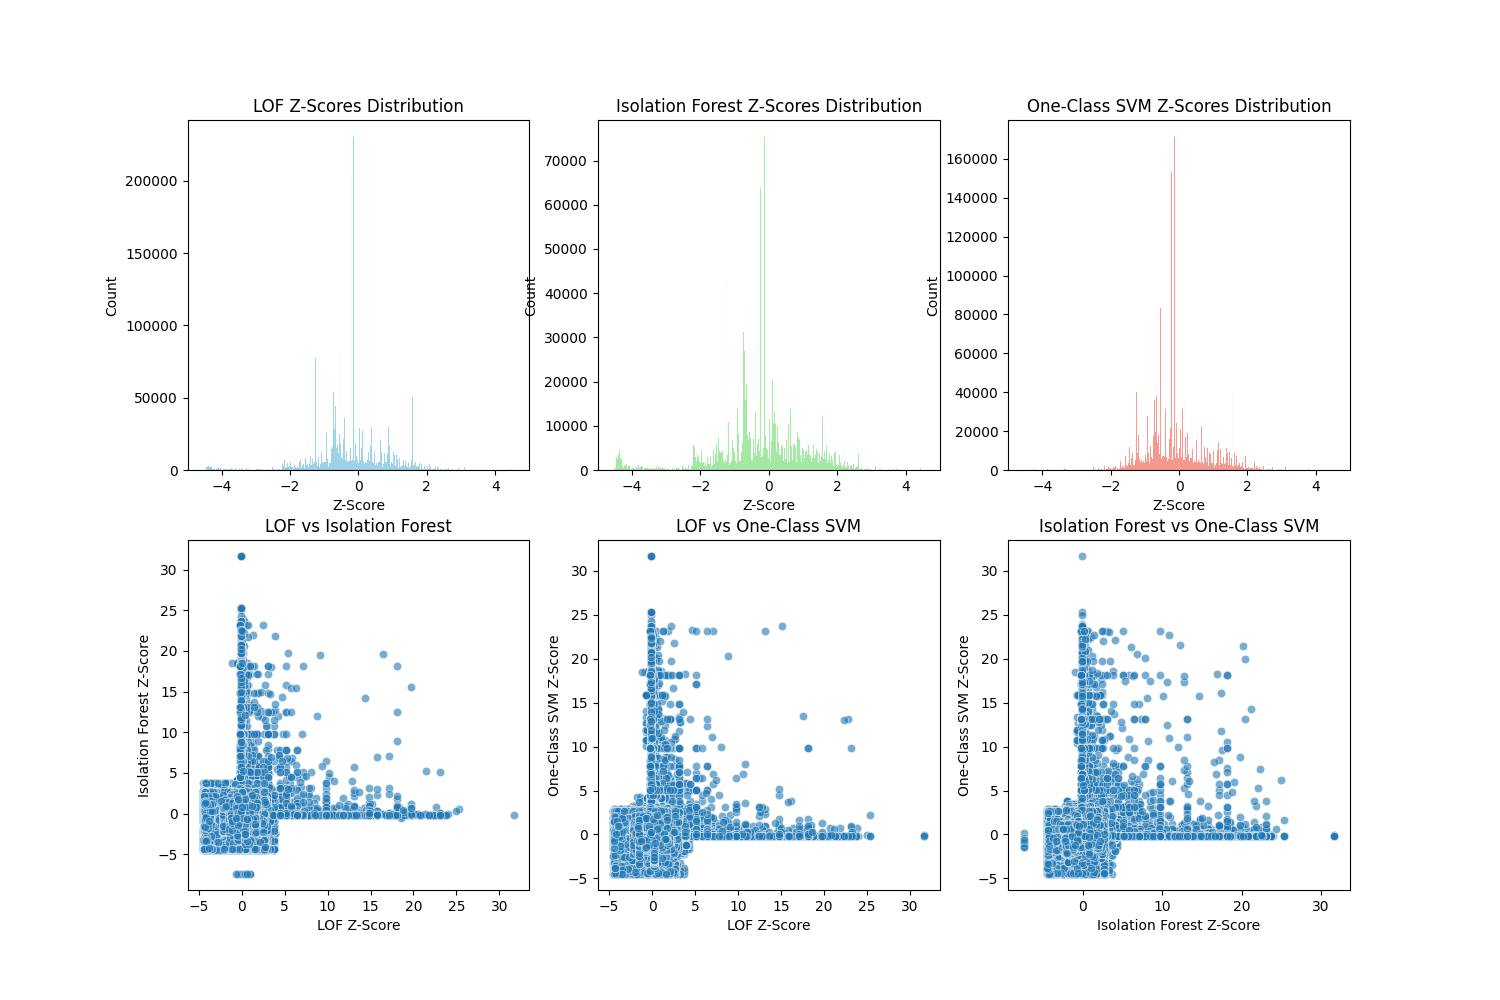

In [10]:
fig = plot_outlier_scores(z_scores_lof, z_scores_iso_for, z_scores_oc_svm)
fig.show()

#### Box plots of outliers z-scores

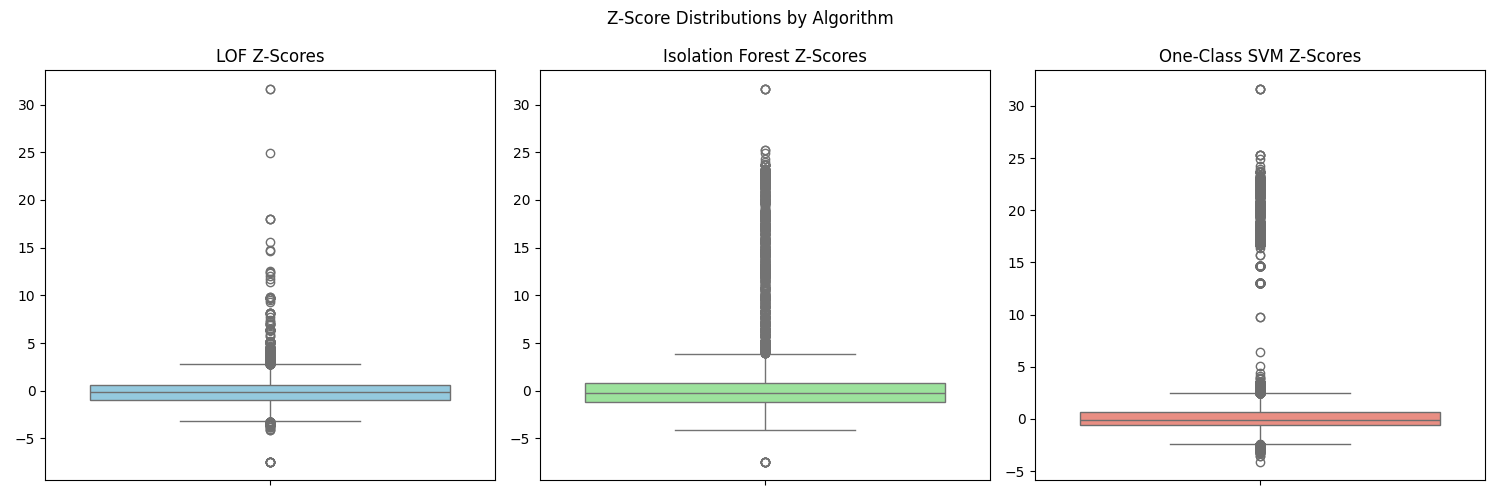

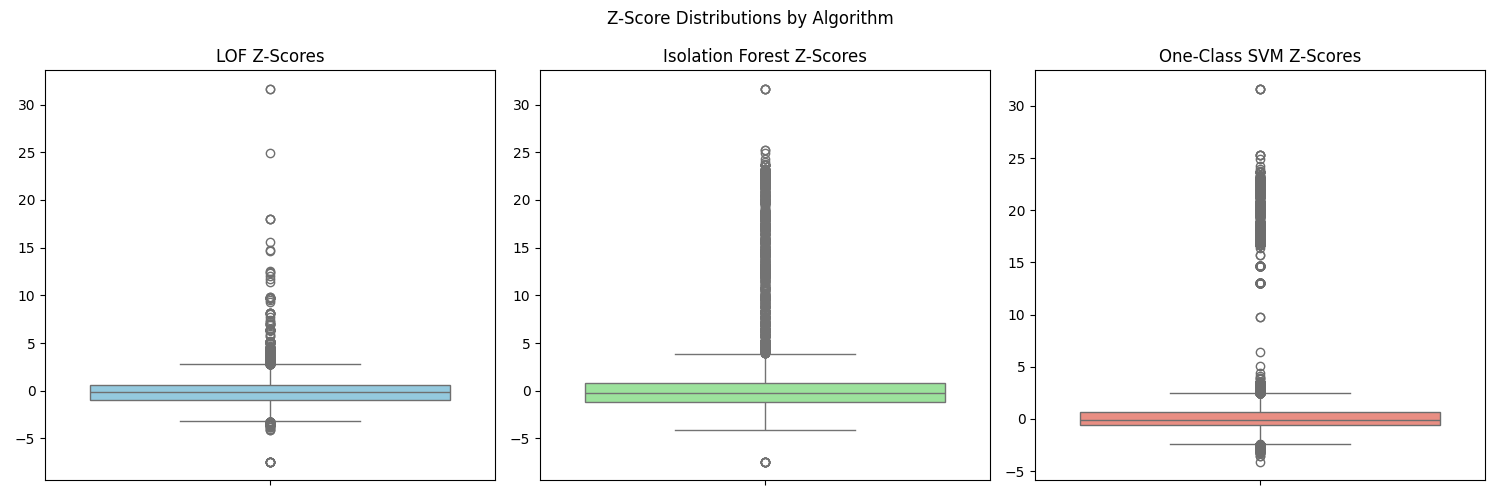

In [18]:
z_scores_dict = {
    "LOF": z_scores_lof,
    "Isolation Forest": z_scores_iso_for,
    "One-Class SVM": z_scores_oc_svm
}

fig = plot_z_score_distributions(z_scores_dict)
fig.show()

### Temporal analysis

In [19]:
from outliers_code.outliers_analysis import create_temporal_visualizations


plots = create_temporal_visualizations(MergedDataset, MergedDataset.loc[all_outliers_indexes])

plots['heatmap'].show()
